## Extracting Information from Web Pages

- This tutorial give an quick overview of how to read a web page and then extracts relevant information
- Please make note that scraping certain information from web pages is illegal and please read terms and conditions of the respective website before doing so
- This notebook is mostly educational and does not promote any kind of illegal web scraping and is not responsible if readers of this post do such activity
- For this tutorial, the BeautifulSoup (https://www.crummy.com/software/BeautifulSoup/) APIs will be used. If not installed, use pip install beautifulsoup4

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import requests
from bs4 import BeautifulSoup

### Enter the amazon product page which contains the product reviews 

In [3]:
url = '''https://www.amazon.com/Echo-Dot-3rd-Gen-Charcoal/product-reviews/B07FZ8S74R/ref=cm_cr_dp_d_show_all_top?ie=UTF8&reviewerType=all_reviews'''

In [4]:
review_html = requests.get(url).text

In [5]:
review_html[0:1000]

'<!DOCTYPE html>\n<!--[if lt IE 7]> <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8 a-lt-ie7"> <![endif]-->\n<!--[if IE 7]>    <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8"> <![endif]-->\n<!--[if IE 8]>    <html lang="en-us" class="a-no-js a-lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!-->\n<html class="a-no-js" lang="en-us"><!--<![endif]--><head>\n<meta http-equiv="content-type" content="text/html; charset=UTF-8">\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n<title dir="ltr">Robot Check</title>\n<meta name="viewport" content="width=device-width">\n<link rel="stylesheet" href="https://images-na.ssl-images-amazon.com/images/G/01/AUIClients/AmazonUI-3c913031596ca78a3768f4e934b1cc02ce238101.secure.min._V1_.css">\n<script>\n\nif (true === true) {\n    var ue_t0 = (+ new Date()),\n        ue_csm = window,\n        ue = { t0: ue_t0, d: function() { return (+new Date() - ue_t0); } },\n        ue_furl = "fls-na.amazon.com",\n        ue_mid = 

In [6]:
# Initialize the beautifulsoup framework
soup = BeautifulSoup(review_html, 'lxml')

In [7]:
## Extract the review title
review_titles = soup.findAll('a', {'class': 'a-size-base a-link-normal review-title a-color-base review-title-content a-text-bold'})

In [8]:
## Extract the complete review texts
review_texts = soup.findAll('span', {'class': 'a-size-base review-text review-text-content'})    

In [10]:
all_urls = []
for i in range(10):
    if i == 0:
        all_urls.append( url )
    else:
        all_urls.append( url + "&pageNumber=" + str(i) )

In [11]:
all_review_texts = []
for each_url in all_urls:
    review_html = requests.get(each_url).text
    soup = BeautifulSoup(review_html, 'lxml')
    review_texts = soup.findAll('span', {'class': 'a-size-base review-text review-text-content'}) 
    this_review_texts = [r.text for r in review_texts]
    all_review_texts = all_review_texts + this_review_texts

In [12]:
all_review_texts[0:2]

["Setup was easy. Worked ok for 2 hrs.Without any input, green light went off and I can hear some random people's private conversation for over 15 mins. I tried to talk back, but I guess they couldn't hear me. There was nothing in my activity.I recorded some of it for proof but, Amazon CS wasn't surprised or concerned. They want to gladly help me reset my device and return it to best buy, where I purchased it from.I am not posting the video as I am concerned about the other person's privacy.I am glad this all happened to me in 2hrs of plugging the device. Don't wait for this to happen to you. Unplug and throw it away.\n",
 "I own a 2nd gen and it works like a dream!! Ordered the 3rd gen hoping it was a upgrade...it's not!!!Pros gen 3:LouderBiggerCons gen 3:Muffled soundCan't hear me in low to moderate noise levelsReaction time lags with wake wordNew plug is not usb compatibleo4 microphones vs 7 on gen 2Long story short..i returned the 3rd gen and ordered a 2nd gen with an indigo case t

In [20]:
import re
# Remove all characters other than alpha numerics from the review titles as well
r_titles = list( map( lambda x: re.sub("[^a-zA-Z]", " ", x ), all_review_texts ))

In [21]:
r_titles[0:1]

['Setup was easy  Worked ok for   hrs Without any input  green light went off and I can hear some random people s private conversation for over    mins  I tried to talk back  but I guess they couldn t hear me  There was nothing in my activity I recorded some of it for proof but  Amazon CS wasn t surprised or concerned  They want to gladly help me reset my device and return it to best buy  where I purchased it from I am not posting the video as I am concerned about the other person s privacy I am glad this all happened to me in  hrs of plugging the device  Don t wait for this to happen to you  Unplug and throw it away  ']

In [23]:
import pandas as pd
review_df = pd.DataFrame(r_titles)

In [24]:
from wordcloud import WordCloud
wordcloud = WordCloud(background_color='white', 
                      max_words=25, max_font_size=60).generate(str(r_titles))

In [25]:
import matplotlib.pyplot as plt 
import seaborn as sn
%matplotlib inline

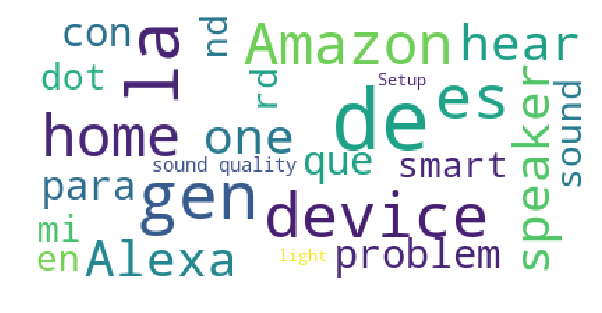

In [26]:
plt.figure( figsize = (10,10))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [27]:
from wordcloud import WordCloud, STOPWORDS

In [28]:
len(STOPWORDS)

190

In [29]:
wordcloud = WordCloud(background_color='white', 
                      stopwords=STOPWORDS, 
                      max_words=25, max_font_size=60, 
                      random_state=42).generate(str(r_titles))

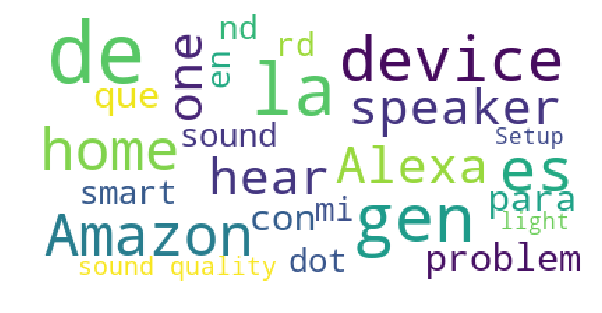

In [30]:
plt.figure( figsize = (10,10))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [31]:
STOPWORDS = set( list(STOPWORDS) + ['Alexa', 'Echo', 'dot', 'Amazon', 'Device', 'gen'])

In [32]:
wordcloud = WordCloud(background_color='white', stopwords=STOPWORDS, 
                      max_words=25, max_font_size=60, random_state=42).generate(str(r_titles))

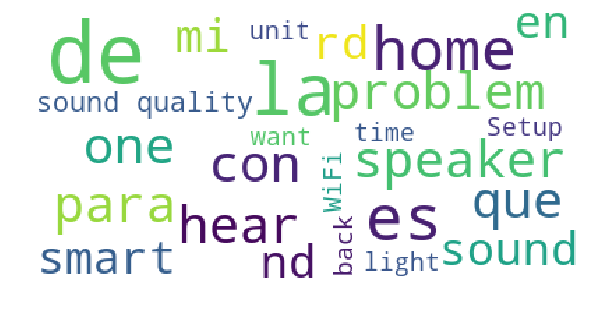

In [33]:
plt.figure( figsize = (10,10))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()